In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  
import numpy as np
import seaborn as sns
#from sklearn.svm import SVC
#from sklearn.model_selection import KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('android.csv')

In [3]:
data

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,41089,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,41375,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,43552,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1


In [4]:
data.shape

(70, 17)

In [5]:
data = data.sample(frac=1).reset_index(drop=True)

In [6]:
data.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,python,0.005,0.279,0.105,30.0,0.038,493.37,666.52,24.81,0.27,138305.0,10.24,82026,77.701,13754.000,2352067,0
1,14218,0.006,4.000,1.000,33.0,0.220,674.02,575.80,4.30,1.57,92447.0,12.52,92443,117.436,13463.000,2218637,1
2,screenshot,0.190,3.000,0.165,7.0,1.523,48.08,35.19,1.13,0.42,361733.0,2.93,84854,30.758,13.393,2109862,0
3,policytool,0.142,3.000,0.291,3.0,0.956,59.38,48.31,0.62,0.96,127285.0,6.22,82793,35.262,13551.000,2042454,0
4,13943,0.488,0.795,0.000,37.0,0.738,216.57,188.24,1.18,1.83,86205.0,12.66,93244,107.295,12601.000,2237832,1


In [7]:
import seaborn as sns

<AxesSubplot:xlabel='malware', ylabel='count'>

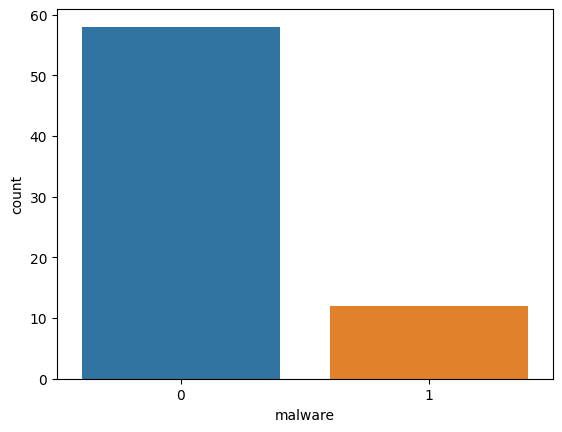

In [8]:
sns.countplot(x='malware',data=data)

In [9]:
target_count = data.malware.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

Class 0: 58
Class 1: 12


In [10]:
count_class_0, count_class_1 = data.malware.value_counts()

In [11]:
df_class_0 = data[data['malware'] == 0]
df_class_1 = data[data['malware'] == 1]

In [12]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


In [13]:
df_test_over.shape

(116, 17)

<AxesSubplot:xlabel='malware', ylabel='count'>

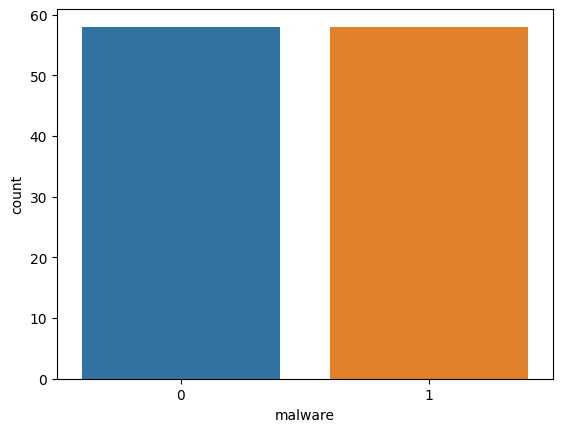

In [14]:
sns.countplot(x='malware',data=df_test_over)

In [15]:
X=df_test_over.iloc[:,df_test_over.columns !='malware']
Y=df_test_over.iloc[:,df_test_over.columns =="malware"]

In [16]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
0,python,0.005,0.279,0.105,30.0,0.038,493.37,666.52,24.81,0.27,138305.0,10.24,82026,77.701,13754.000,2352067
2,screenshot,0.190,3.000,0.165,7.0,1.523,48.08,35.19,1.13,0.42,361733.0,2.93,84854,30.758,13.393,2109862
3,policytool,0.142,3.000,0.291,3.0,0.956,59.38,48.31,0.62,0.96,127285.0,6.22,82793,35.262,13551.000,2042454
5,zsh,0.050,0.574,0.185,26.0,0.423,30.83,19.64,0.71,0.43,161921.0,1.11,42612,21.307,3492.000,1304750
6,telnet,0.001,0.967,0.242,31.0,0.995,125.05,96.35,1.75,0.71,158966.0,7.81,98087,124.647,12089.000,2354092


In [17]:
Y.head()

,malware
0,0
2,0
3,0
5,0
6,0


In [18]:
from sklearn.utils import shuffle

In [19]:
X, Y=shuffle(X, Y)

In [20]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
50,18585,0.174,0.000,0.000,19.0,0.867,147.94,126.28,0.96,1.54,65102.0,19.76,86649,78.975,18742.0,2079722
28,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964
4,13943,0.488,0.795,0.000,37.0,0.738,216.57,188.24,1.18,1.83,86205.0,12.66,93244,107.295,12601.0,2237832
9,service,0.670,3.000,2.000,86.0,0.000,62414.16,147267.45,2617.31,0.56,165426.0,12.13,87418,81.558,28428.0,2295638
5,zsh,0.050,0.574,0.185,26.0,0.423,30.83,19.64,0.71,0.43,161921.0,1.11,42612,21.307,3492.0,1304750


In [21]:
X=X.drop(columns='name')
X.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
50,0.174,0.000,0.000,19.0,0.867,147.94,126.28,0.96,1.54,65102.0,19.76,86649,78.975,18742.0,2079722
28,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964
4,0.488,0.795,0.000,37.0,0.738,216.57,188.24,1.18,1.83,86205.0,12.66,93244,107.295,12601.0,2237832
9,0.670,3.000,2.000,86.0,0.000,62414.16,147267.45,2617.31,0.56,165426.0,12.13,87418,81.558,28428.0,2295638
5,0.050,0.574,0.185,26.0,0.423,30.83,19.64,0.71,0.43,161921.0,1.11,42612,21.307,3492.0,1304750


In [22]:
Y.head()

,malware
50,1
28,1
4,1
9,0
5,0


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [25]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.nlargest(10,'Score')  

,Specs,Score
9,branches,968093.220193
14,ref-cycles,596167.561275
6,stalled-cycles-backend-percent,126596.979890
11,bus-cycle,66522.758624
5,stalled-cycles-frontend-percent,40521.505445
13,cache-references,4922.825365
7,Instructions-per-cycle,2779.035480
12,cache-misses-percent,459.780686
3,page-faults,162.740452
10,branch-misses-percent,108.129953


[0.07249509 0.04685392 0.03589189 0.04815635 0.04904368 0.0265256
 0.02366733 0.0344632  0.18070719 0.07457747 0.13687904 0.08309517
 0.09807557 0.02907501 0.06049351]


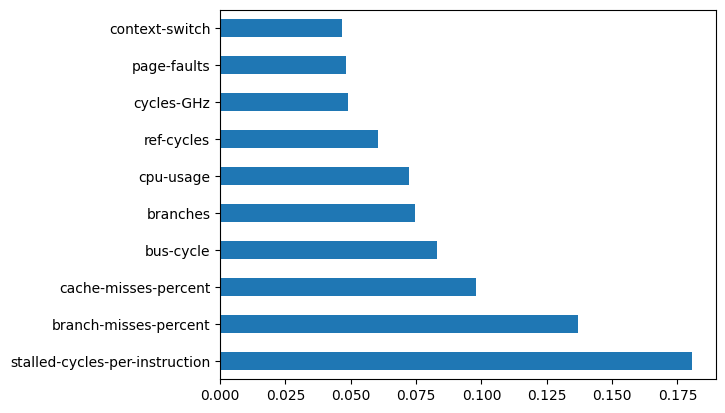

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [28]:
X_train.shape

(92, 15)

In [29]:
X_train.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
47,0.190,4.000,0.137,14.0,0.693,74.91,65.85,1.49,0.50,241903.0,2.89,65722,54.560,13870.0,1699014
7,0.571,2.000,0.099,15.0,1.368,58.01,47.29,0.75,0.77,214333.0,3.67,73294,30.224,17894.0,1716287
21,0.342,0.477,0.027,11.0,1.038,69.52,56.13,1.10,0.63,236994.0,6.15,98792,33.237,12826.0,2370923
10,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652
29,0.000,0.000,0.000,20.0,0.895,146.87,121.17,0.88,1.66,74229.0,21.01,81379,83.942,19661.0,1953340


In [30]:
y_train.head()

,malware
47,0
7,0
21,0
10,1
29,0


In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# DecisionTreeClassifier 

In [32]:
from sklearn.tree import DecisionTreeClassifier 

In [33]:
tree = DecisionTreeClassifier() 

In [34]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = tree.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1], dtype=int64)

In [36]:
model2=metrics.accuracy_score(y_test,y_pred)
print(model2)

1.0


In [37]:
cnf_matrix = confusion_matrix(y_test,y_pred)

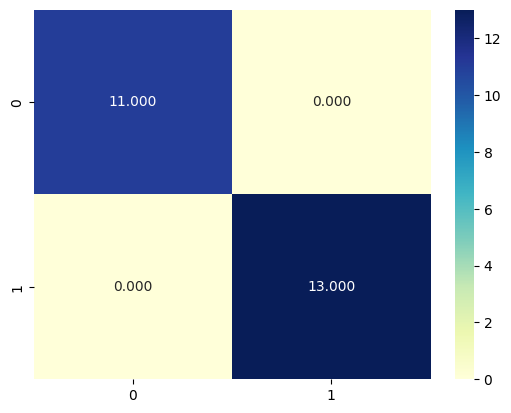

In [38]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()